<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive


In [2]:
import cv2
import gc
import numpy as np
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import time
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from keras.layers import *
from sklearn.metrics import accuracy_score
from keras.applications import VGG19
from tqdm import tqdm
from keras import backend as K
from tqdm import tqdm

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

In [0]:
#shuffle samples
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]



#change targets
def change(img):
    resized = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA )
    return resized




#get train and test splits
def get_trn_tst(df,tst_fold):
  idx=np.asarray(df['fold'])
  y=np.asarray(df['label'])
  y-=1
  img=np.asarray(df['image'])
  img1=[]
  for i in range(len(img)):
        img1.append(change(img[i]))
  img1=np.asarray(img1)
  del([img])
  gc.collect()
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img1[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img1[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],224,224,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],224,224,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

In [0]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import *
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from keras.layers import *
import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

  0%|          | 0/5 [00:00<?, ?it/s]

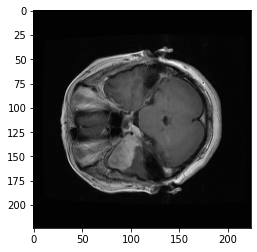

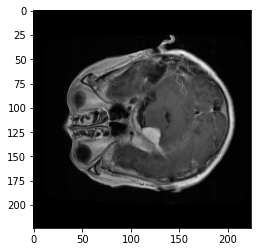

Epoch 1/100
2522/2522 [==============================] - 12s 5ms/step - loss: 1.2838 - accuracy: 0.8077
Epoch 2/100
2522/2522 [==============================] - 10s 4ms/step - loss: 0.8907 - accuracy: 0.8719
Epoch 3/100
2522/2522 [==============================] - 10s 4ms/step - loss: 0.6216 - accuracy: 0.9005
Epoch 4/100
2522/2522 [==============================] - 10s 4ms/step - loss: 0.5323 - accuracy: 0.9148
Epoch 5/100
2522/2522 [==============================] - 10s 4ms/step - loss: 0.4481 - accuracy: 0.9187
Epoch 6/100
2522/2522 [==============================] - 10s 4ms/step - loss: 0.4525 - accuracy: 0.9191
Epoch 7/100
2522/2522 [==============================] - 10s 4ms/step - loss: 0.3354 - accuracy: 0.9346
Epoch 8/100
2522/2522 [==============================] - 10s 4ms/step - loss: 0.3087 - accuracy: 0.9362
Epoch 9/100
2522/2522 [==============================] - 10s 4ms/step - loss: 0.2865 - accuracy: 0.9350
Epoch 10/100
2522/2522 [==============================] - 10s 4m

 20%|██        | 1/5 [16:48<1:07:14, 1008.68s/it]

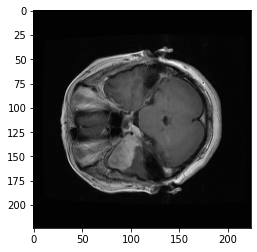

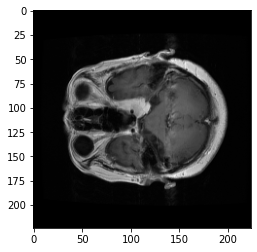

Epoch 1/100
2385/2385 [==============================] - 10s 4ms/step - loss: 1.2723 - accuracy: 0.8214
Epoch 2/100
2385/2385 [==============================] - 9s 4ms/step - loss: 0.8256 - accuracy: 0.8876
Epoch 3/100
2385/2385 [==============================] - 9s 4ms/step - loss: 0.5924 - accuracy: 0.8998
Epoch 4/100
2385/2385 [==============================] - 9s 4ms/step - loss: 0.6015 - accuracy: 0.9086
Epoch 5/100
2385/2385 [==============================] - 9s 4ms/step - loss: 0.4219 - accuracy: 0.9304
Epoch 6/100
2385/2385 [==============================] - 9s 4ms/step - loss: 0.3908 - accuracy: 0.9308
Epoch 7/100
2385/2385 [==============================] - 9s 4ms/step - loss: 0.3259 - accuracy: 0.9392
Epoch 8/100
2385/2385 [==============================] - 9s 4ms/step - loss: 0.3268 - accuracy: 0.9379
Epoch 9/100
2385/2385 [==============================] - 9s 4ms/step - loss: 0.3678 - accuracy: 0.9338
Epoch 10/100
2385/2385 [==============================] - 9s 4ms/step - 

 40%|████      | 2/5 [32:00<48:58, 979.51s/it]   

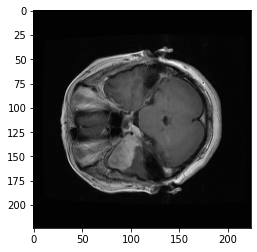

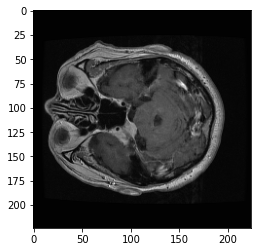

Epoch 1/100
2492/2492 [==============================] - 11s 4ms/step - loss: 1.2756 - accuracy: 0.8186
Epoch 2/100
2492/2492 [==============================] - 10s 4ms/step - loss: 0.8009 - accuracy: 0.8896
Epoch 3/100
2492/2492 [==============================] - 10s 4ms/step - loss: 0.6212 - accuracy: 0.9013
Epoch 4/100
2492/2492 [==============================] - 10s 4ms/step - loss: 0.5380 - accuracy: 0.9165
Epoch 5/100
2492/2492 [==============================] - 10s 4ms/step - loss: 0.4704 - accuracy: 0.9169
Epoch 6/100
2492/2492 [==============================] - 10s 4ms/step - loss: 0.3454 - accuracy: 0.9342
Epoch 7/100
2492/2492 [==============================] - 10s 4ms/step - loss: 0.3177 - accuracy: 0.9418
Epoch 8/100
2492/2492 [==============================] - 10s 4ms/step - loss: 0.3365 - accuracy: 0.9290
Epoch 9/100
2492/2492 [==============================] - 10s 4ms/step - loss: 0.2357 - accuracy: 0.9494
Epoch 10/100
2492/2492 [==============================] - 10s 4m

 60%|██████    | 3/5 [48:23<32:41, 980.80s/it]

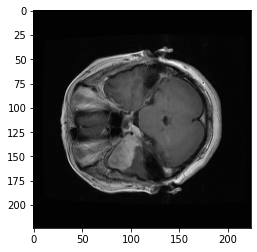

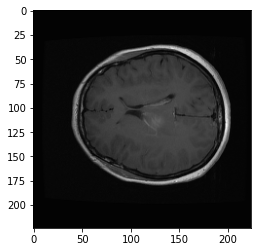

Epoch 1/100
2436/2436 [==============================] - 10s 4ms/step - loss: 1.2124 - accuracy: 0.8038
Epoch 2/100
2436/2436 [==============================] - 9s 4ms/step - loss: 0.8638 - accuracy: 0.8658
Epoch 3/100
2436/2436 [==============================] - 9s 4ms/step - loss: 0.6638 - accuracy: 0.9011
Epoch 4/100
2436/2436 [==============================] - 9s 4ms/step - loss: 0.7127 - accuracy: 0.8924
Epoch 5/100
2436/2436 [==============================] - 9s 4ms/step - loss: 0.4501 - accuracy: 0.9212
Epoch 6/100
2436/2436 [==============================] - 9s 4ms/step - loss: 0.4945 - accuracy: 0.9113
Epoch 7/100
2436/2436 [==============================] - 9s 4ms/step - loss: 0.3369 - accuracy: 0.9249
Epoch 8/100
2436/2436 [==============================] - 9s 4ms/step - loss: 0.3528 - accuracy: 0.9257
Epoch 9/100
2436/2436 [==============================] - 9s 4ms/step - loss: 0.3398 - accuracy: 0.9364
Epoch 10/100
2436/2436 [==============================] - 9s 4ms/step - 

 80%|████████  | 4/5 [1:04:02<16:08, 968.24s/it]

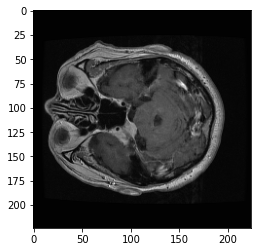

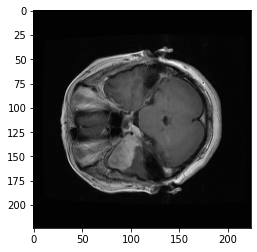

Epoch 1/100
2421/2421 [==============================] - 10s 4ms/step - loss: 1.1032 - accuracy: 0.8253
Epoch 2/100
2421/2421 [==============================] - 9s 4ms/step - loss: 0.6701 - accuracy: 0.8971
Epoch 3/100
2421/2421 [==============================] - 9s 4ms/step - loss: 0.6706 - accuracy: 0.8992
Epoch 4/100
2421/2421 [==============================] - 9s 4ms/step - loss: 0.4691 - accuracy: 0.9236
Epoch 5/100
2421/2421 [==============================] - 9s 4ms/step - loss: 0.4440 - accuracy: 0.9302
Epoch 6/100
2421/2421 [==============================] - 9s 4ms/step - loss: 0.3030 - accuracy: 0.9418
Epoch 7/100
2421/2421 [==============================] - 9s 4ms/step - loss: 0.3014 - accuracy: 0.9418
Epoch 8/100
2421/2421 [==============================] - 9s 4ms/step - loss: 0.2572 - accuracy: 0.9521
Epoch 9/100
2421/2421 [==============================] - 9s 4ms/step - loss: 0.2211 - accuracy: 0.9542
Epoch 10/100
2421/2421 [==============================] - 9s 4ms/step - 

100%|██████████| 5/5 [1:19:34<00:00, 954.95s/it]


In [6]:
#store the accuracy
final_result=[]
#store history
history=[]
#store predictions
predictions=[]
#store answers
answers=[]
#store time taken
times=[]



#loop through each fold
for index in tqdm(range(1,6)):
  
  
  
  #set epoch
  epoch=100
  #loading train and test folds and showing image
  trn,tst=get_trn_tst(df,index)



  #show first sample of train and test fold
  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()



  #shuffle train and test splits
  trn_x,trn_y=unison_shuffled_copies(trn[0],trn[1])
  tst_x,tst_y=unison_shuffled_copies(tst[0],tst[1])
  


  #loading model
  K.clear_session()
  mod=mobilenet.MobileNet(include_top=True, weights='imagenet')
  out_1=mod.layers[-2].output
  out=Dense(3,activation='softmax')(out_1)
  



  #adding global pooling layer to decrease dimension
  model=Model(inputs=mod.input,outputs=out)
  
  

  #set all layers to non trainable
  for i in range(len(model.layers)):
    model.layers[i].trainable = False
  
  
  
  
  #set last layer to trainable
  model.layers[-1].trainable=True





  #compiling the model
  model.compile(optimizer=Adam(0.01), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
  
  



  #learning rate schedular
  def cng(idx):
    return 0.01*(0.0001)**(idx/epoch)
  lrs=LearningRateScheduler(cng)




  
  
  
  #fitting the model 
  #timing
  start=time.time()
  hist=model.fit(trn_x,to_categorical(trn_y),batch_size=32,epochs=epoch,callbacks=[lrs])
  end=time.time()
  times.append(end-start)


  #getting the prediction 
  pre=model.predict(tst_x)
  



  #storing the predictions
  predictions.append(pre)



  #select the maximum position
  pre=np.argmax(pre,1)

  
  
  
  #getting the accuracy
  new_acc=accuracy_score(pre,tst_y)

  
  
  #storing the new accuracy
  final_result.append(new_acc)



  #storing the result
  history.append(hist.history)







  #storing the answers
  answers.append(tst_y)
    
    
    
    
  #freeing memory
  del([trn,tst,trn_x,trn_y,tst_x,tst_y])
  gc.collect()

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [8]:
mod=mobilenet.MobileNet(include_top=True, weights='imagenet')
mod.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

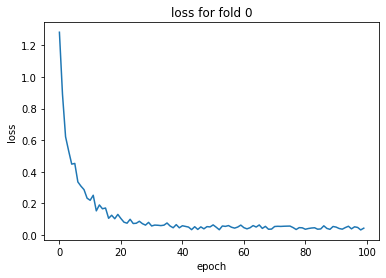

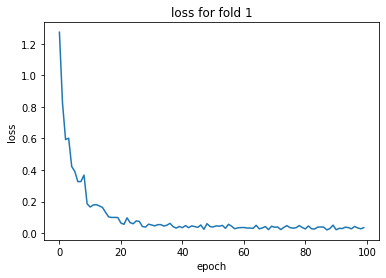

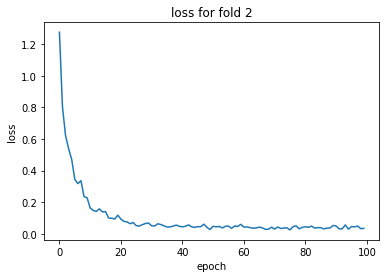

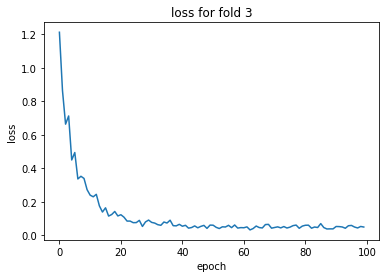

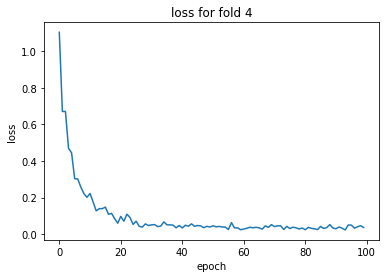

In [9]:
from matplotlib import pyplot as plt
for i in range(5):
    plt.plot(history[i]['loss'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

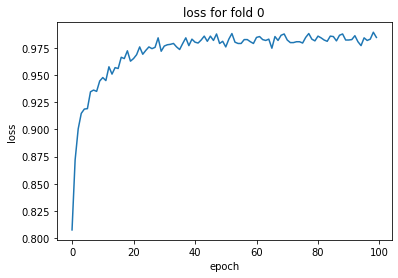

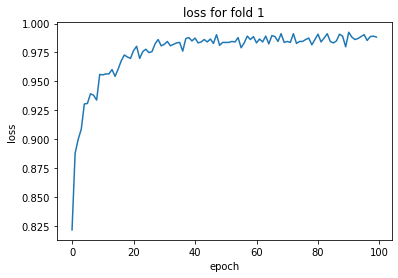

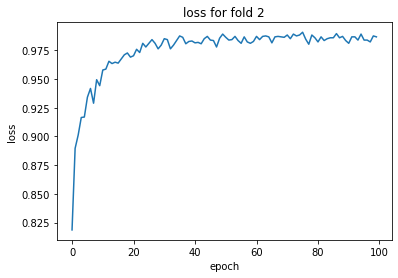

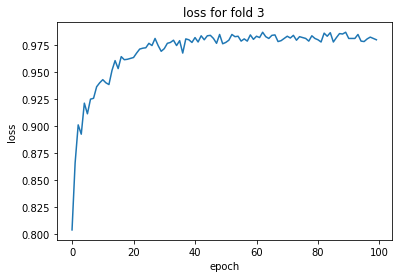

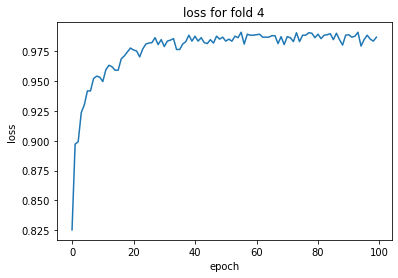

In [10]:
from matplotlib import pyplot as plt
for i in range(5):
    plt.plot(history[i]['accuracy'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [11]:
np.mean(final_result)

0.551659530290166

In [0]:
cm=[]
for i in predictions:
  cm.append(np.argmax(i,1))

In [0]:
from sklearn.metrics import confusion_matrix
conf=[]
for i in range(len(cm)):
  conf.append(confusion_matrix(answers[i],cm[i]))

In [14]:
from sklearn.metrics import confusion_matrix
for i in range(len(predictions)):
    pre=np.argmax(predictions[i],1)
    print(confusion_matrix(answers[i],pre))
    print()

[[ 26  86   0]
 [  9 236   0]
 [ 30 153   2]]

[[ 68  92   7]
 [ 17 321   0]
 [ 54  63  57]]

[[ 39 100   0]
 [ 14 217   0]
 [ 72 117  13]]

[[ 50  73   1]
 [ 17 308   0]
 [ 70 105   4]]

[[ 73  90   3]
 [ 16 270   1]
 [ 53 115  22]]

